In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import dateutil
import time
from datetime import datetime
import xlrd
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
# import folium
# path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# fontprop = fm.FontProperties(fname=path, size=12)
# plt.rcParams['font.sans-serif']=['NanumGothic']
# plt.rcParams['axes.unicode_minus']=False

# 코로나 데이터로 관심있는 분야 시각화
-------------

## 목표 : 코로나 시대에 도움되는 인사이트 발굴


### 1.Dacon dataset (출처 : dacon.io)
-------------

##### card.csv : 전체 매출중 배달이 차지하는 비중?
* receipt_dttm : 카드회사가 카드사용 내역을 접수한 일자
* adstrd_code : 가맹점 위치 기준 행정동 코드
* adstrd_nm : 가맹점 위치 기준 행정동명
* mrhst_induty_cl_code : 가맹점 업종코드
* mrhst_induty_cl_nm : 가맹점 업종명
* selng_cascnt : 매출발생건수
* salamt : 매출발생금액 

##### delivery.csv : 코로나와 배달의 상관관계
* **순번**
* **처리일시 (기간별 배달 횟수 추이)**
* 배달요청업체 ID
* **배달 요청 상태값 (1:완료, 2:취소, 3:사고, 4:문의)**
* 배달접수회사 ID
* 배달상점ID
* **배달상점 업종이름(어떤 업종이 가장 인기가 많을까)**
* 배달상점 주소 법정동코드
* 배달상점 주소 법정동 시도명
* 배달상점 주소 법정동 시군구명
* 배달상점 주소 법정동 읍면동명
* 배달상점 주소 법정동 리명
* **배달상점 주소 행정동 코드(지역별 배달 데이터, 다른 데이터들과 통일할 때 사용)**
* 배달상점주소 도로명주소 코드
* 배달목적지 주소 법정동코드
* 배달목적지 주소 법정동 시도명
* 배달목적지 주소 법정동 시군구명
* 배달목적지 주소 법정동 읍면동명
* 배달목적지 주소 법정동 리명
* 배달목적지 주소 행정동 코드
* 배달목적지주소 도로명주소 코드
* **배달기사 ID ( 배달기사가 더 많아졌을까?)** 
* **배달비용 (한 업체에서 배달비를 인상한 경우가 있을까?)**
* 호출중계수수료금액
* **배달상품금액 (단체주문수가 감소했을 것. 배달 상품 가격이 낮을 수록 1인고객이 많을 것이고, 횟수가 많을 것이다.)**
* **결제종류번호 (1:카드, 2:선불, 3:현금) -결제 패턴에 변화가 있었을까?**
* **결제카드종류**
* 배달접수시간
* 배달배차시간
* 배달완료시간
* 배달취소시간

##### COVID_19 : 서울 내 코로나 확진자수 데이터 
* case : 서울시 감염케이스 별 확진자수, 구정보. 
* patientInfo : 환자 정보
* Policy : 정책 정보. (시작,끝 날짜)
* Region : 지역별 시설 현황  
* **Time : 시간별 전체 확진자수** 
* time age : 시간별 연령대별 확진자수 



## 2. 가설 - 코로나로 인한 배달산업이 맞이한 변화
-------------

### 1. 배달 이용자 수 변화 : 
    - 코로나가 증가하면서 확진자가 증가, 자가격리자, 재택근무자가 증가하면서 배달업이 상승했을 것이다. 
### 2. 배달기사 수의 변화 : 
    - 배달업이 상승하면서 배달기사도 증가했을까? 
### 3. 배달 품목에 따른 이용량 변화 :
    - 카페에 가지 않고 디저트나 커피를 배달을 이용해 사용했을 것이다.
    - 평소 직접 가서 먹어야만 된다고 생각했던 음식들을 배달을 이용하는 경우가 늘어날 것이다. 
### 4. 결제 패턴의 변화 : 
    - 배달업을 할 때 배달기사와의 접촉을 줄이기 위해서 선불을 많이 이용했을 것이다.


## 3.Data Preprocessing & visualization
-------------


### 3.0 소비량(카드 이용량) 변화 
#### 가설 : 코로나로 인해 소비자들의 소비심리가 위축되고 그로인해 소비가 줄어들 것
#### 결과 
  * 카드 소비량이 코로나가 심해진 2월말부터 급격하게 낮아짐
 

In [5]:
df_card.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200104,1174066000,성내3동,7041,약국,463,5843230
1,20200104,1174066000,성내3동,7022,치과의원,33,7835550
2,20200104,1174066000,성내3동,7021,한의원,53,4589800
3,20200104,1174066000,성내3동,7020,의원,339,9267240
4,20200104,1174066000,성내3동,6110,자동차정비,19,4441000


Text(0.5, 1.0, '전체 소비량 이동평균')

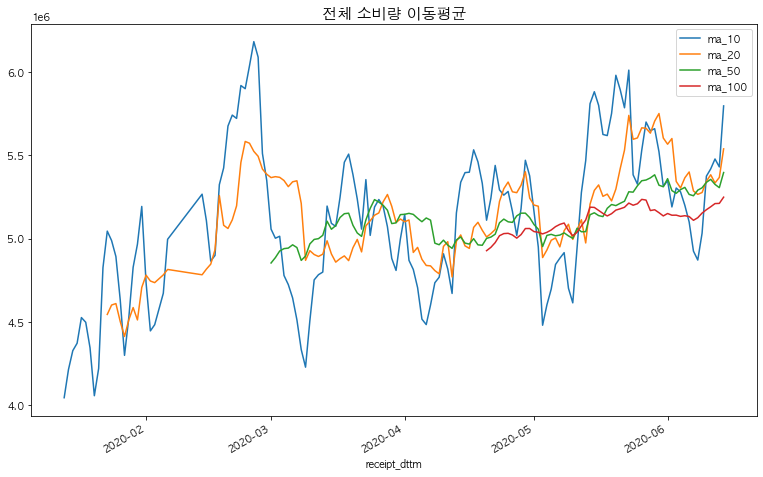

In [9]:
plt.figure(figsize=(13,8))
df_card.groupby('receipt_dttm')['selng_cascnt'].sum().rolling(10).mean().plot()
df_card.groupby('receipt_dttm')['selng_cascnt'].sum().rolling(20).mean().plot()
df_card.groupby('receipt_dttm')['selng_cascnt'].sum().rolling(50).mean().plot()
df_card.groupby('receipt_dttm')['selng_cascnt'].sum().rolling(100).mean().plot()
plt.legend(['ma_10','ma_20','ma_50','ma_100'])
plt.title("전체 소비량 이동평균", fontsize=15)

#### 일별 코로나 확진자 수 

Text(0.5, 1.0, '코로나 확진자 추이')

<Figure size 720x504 with 0 Axes>

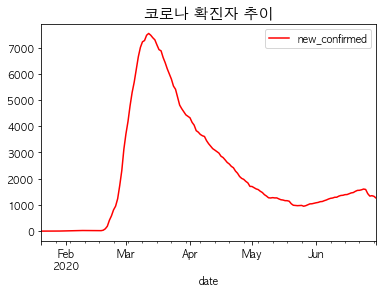

In [21]:
#날짜별 확진자수 추이
plt.figure(figsize=(10,7))
df_TimePatient[["date","new_confirmed"]].plot('date','new_confirmed',c='r')
plt.title("코로나 확진자 추이", fontsize=15)

#### 전국 총 배달량 추이

Text(0.5, 1.0, '전국 일 별 총 배달량 추이')

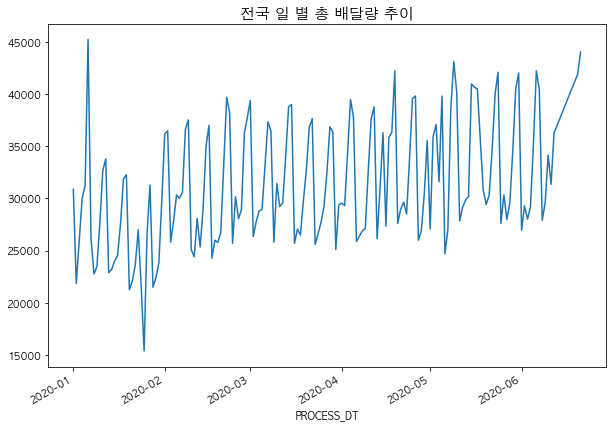

In [121]:
plt.figure(figsize=(10,7))
df_del.groupby('PROCESS_DT')['SERIAL_NUMBER'].count().plot()
plt.title("전국 일 별 총 배달량 추이", fontsize=15)

In [30]:
cnt_del = pd.DataFrame(df_del.groupby('PROCESS_DT')['SERIAL_NUMBER'].count())

#### 이동평균을 통한 배달량 추이 파악

In [31]:
def rolling_mean(df) :
    df.rolling(10).mean().plot()
    df.rolling(20).mean().plot()
    df.rolling(50).mean().plot()
    df.rolling(100).mean().plot()
    plt.legend(['ma_10','ma_20','ma_50','ma_100'])
    

Text(0.5, 1.0, '전국 배달량 이동평균')

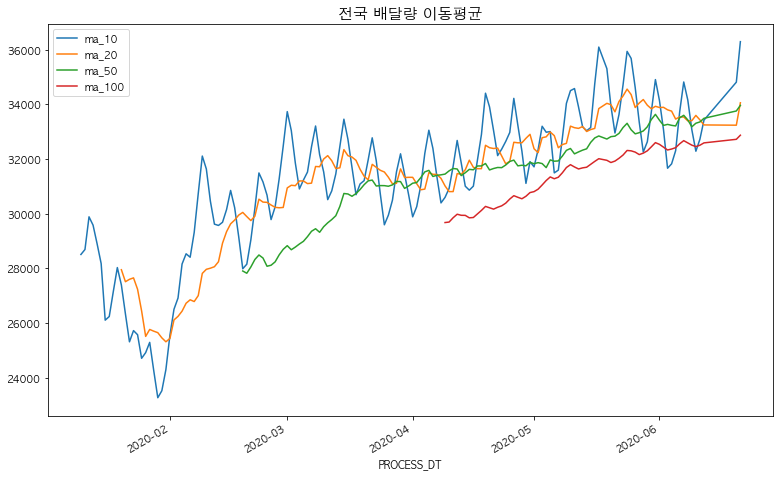

In [32]:
plt.figure(figsize=(13,8))
cnt_del['SERIAL_NUMBER'].rolling(10).mean().plot()
cnt_del['SERIAL_NUMBER'].rolling(20).mean().plot()
cnt_del['SERIAL_NUMBER'].rolling(50).mean().plot()
cnt_del['SERIAL_NUMBER'].rolling(100).mean().plot()
plt.legend(['ma_10','ma_20','ma_50','ma_100'])
plt.title("전국 배달량 이동평균", fontsize=15)

### 3.1 배달 이용량 변화 :
#### 가설 : 코로나 감염을 방지하고 사람과의 접촉을 줄이기 위해 배달량이 늘어났을 것.
#### 결과 
  * 실제로 꾸준하게 배달량이 증가한 것을 볼수 있음
 

Text(0.5, 1.0, '코로나 확진자수')

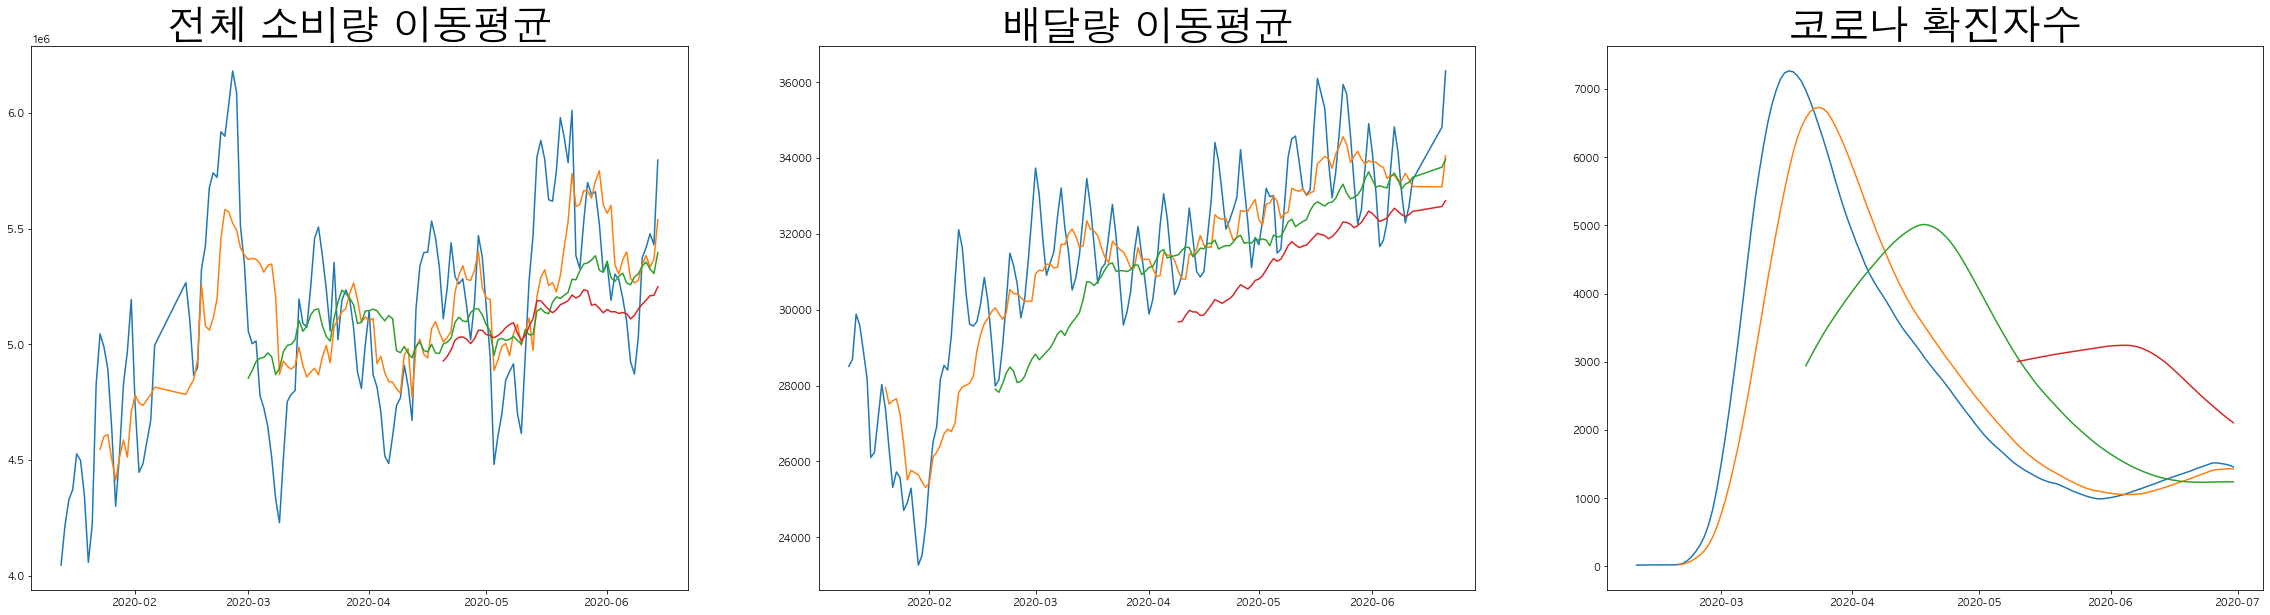

In [33]:
# 주로 for문으로 사용한다. ax의 경우
fig, ax = plt.subplots(1, 3,figsize=(40,10)) # 각 액자들에 그래프를 그린다. 
ax[0].plot(df_card.groupby('receipt_dttm')['selng_cascnt'].sum().rolling(10).mean()) 
ax[0].plot(df_card.groupby('receipt_dttm')['selng_cascnt'].sum().rolling(20).mean()) 
ax[0].plot(df_card.groupby('receipt_dttm')['selng_cascnt'].sum().rolling(50).mean()) 
ax[0].plot(df_card.groupby('receipt_dttm')['selng_cascnt'].sum().rolling(100).mean()) 
ax[0].set_title("전체 소비량 이동평균",fontsize =40)


ax[1].plot(cnt_del['SERIAL_NUMBER'].rolling(10).mean()) 
ax[1].plot(cnt_del['SERIAL_NUMBER'].rolling(20).mean()) 
ax[1].plot(cnt_del['SERIAL_NUMBER'].rolling(50).mean()) 
ax[1].plot(cnt_del['SERIAL_NUMBER'].rolling(100).mean()) 
ax[1].set_title("배달량 이동평균",fontsize =40)

ax[2].plot(df_TP.rolling(10).mean())
ax[2].plot(df_TP.rolling(20).mean())
ax[2].plot(df_TP.rolling(50).mean())
ax[2].plot(df_TP.rolling(100).mean())
ax[2].set_title("코로나 확진자수",fontsize =40)

* 확진자,격리자가 가장 많은 3월에 배달량도 가장 많다

#### 요일별 주기 확인 


- 평일에 비해 상대적으로 금,토,일 요일에 배달량이 많은 것을 확인할 수 있다.
- 월별 배달량보다 요일에 따른 배달량 차이가 큼

Text(0.5, 1.0, '서울 요일별 배달량')

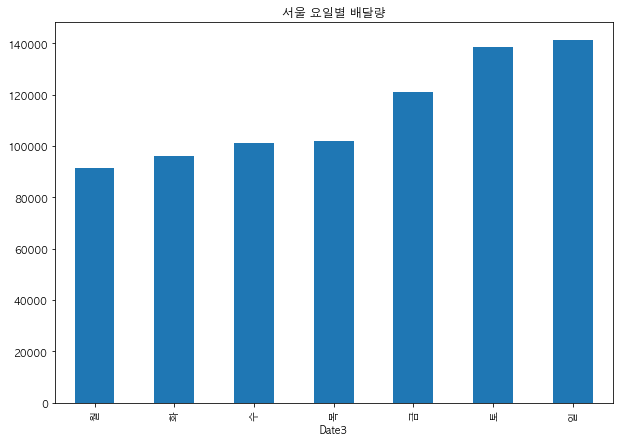

In [53]:
plt.figure(figsize=(10,7))
df_del_seoul.groupby('Date3')['Date2'].count().sort_values().plot.bar()
plt.title("서울 요일별 배달량")
#라벨

#### 상관관계 (월, 주 , 코로나 확진자, 배달건수)
- 요일 = 0.77
- 확진자수 =0.13
- 월 = 0.04

Text(0.5, 1.0, '배달수-코로나-날짜 상관관계')

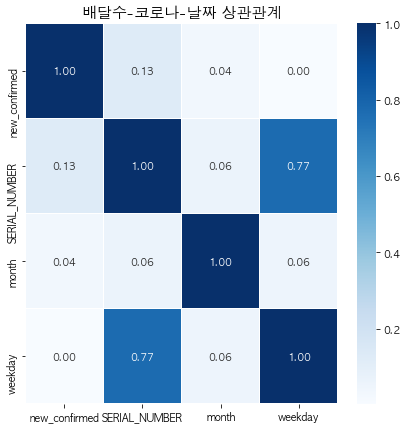

In [65]:
plt.figure(figsize=(7,7))
sns.heatmap(data = df_cor_del.corr(), annot =True, fmt='.2f', linewidths=.5,cmap='Blues')
plt.title("배달수-코로나-날짜 상관관계", fontsize=15)

### 3.2 배달기사 수의 변화
#### 가설 : 배달의 이용이 증가하는 만큼 배달기사의 수도 증가할 것이다. 
- 배달기사수가 꾸준히 증가하는 추세이다
- 배달 기사의 수도 주기성을 띄고있는데 이는 주말에만 배달을 하는 기사들이 존재해서 그런 것으로 보인다.
- 2020-01-24~2020-01-27. 설날에는 배달을 거의 이용하지 않고 배달기사들이 일을 하지 않았다.

<Figure size 720x504 with 0 Axes>

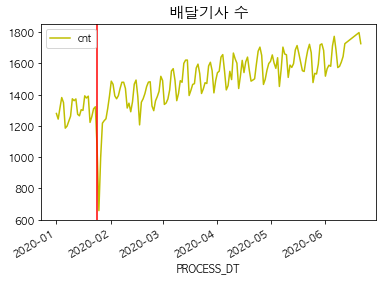

In [76]:
plt.figure(figsize=(10,7))
df_del_man[['PROCESS_DT','cnt']].plot('PROCESS_DT','cnt',c='y')
plt.title("배달기사 수", fontsize=15)
plt.axvline('2020-01-24', color='r')

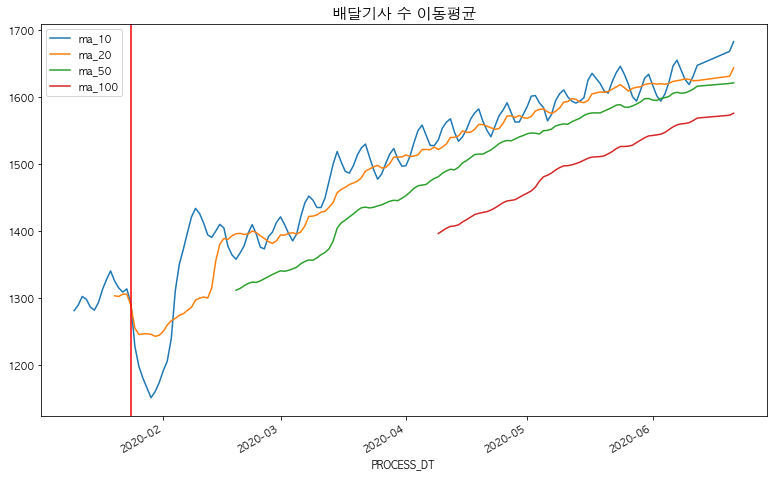

In [85]:
plt.figure(figsize=(13,8))
rolling_mean(df_dm['cnt'])
plt.title("배달기사 수 이동평균", fontsize=15)
plt.axvline('2020-01-24', color='r')

#### 배달 품목 데이터

In [87]:
df_del["DLVR_STORE_INDUTY_NM"].unique()

array(['치킨', '찜탕', '한식', '족발/보쌈', '분식', '야식', '돈까스/일식', '회', '피자', '중식',
       '카페/디저트', '심부름', '배달전문업체', '패스트푸드', '아시안/양식', '도시락'], dtype=object)

In [89]:
del_list

['치킨',
 '찜탕',
 '한식',
 '족발/보쌈',
 '분식',
 '야식',
 '돈까스/일식',
 '회',
 '피자',
 '중식',
 '카페/디저트',
 '심부름',
 '배달전문업체',
 '패스트푸드',
 '아시안/양식',
 '도시락']

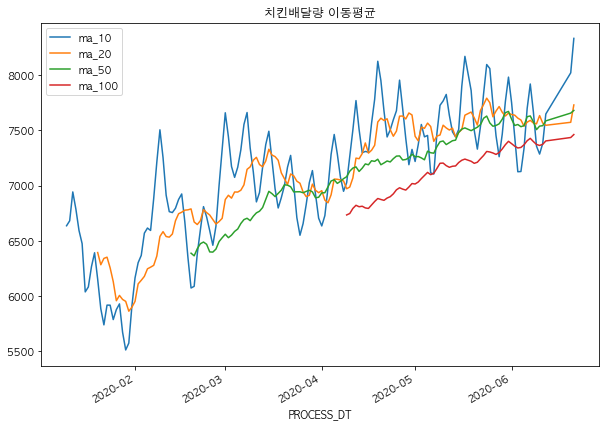

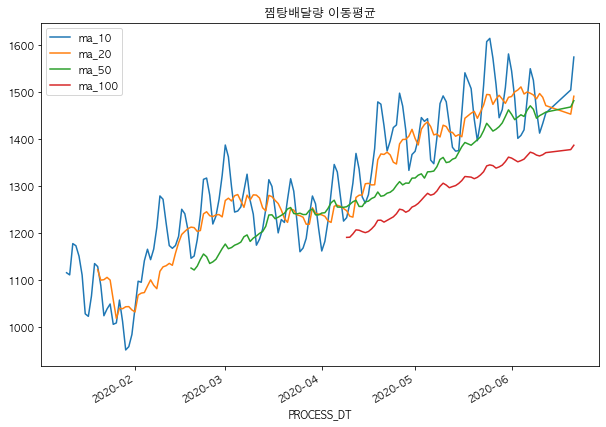

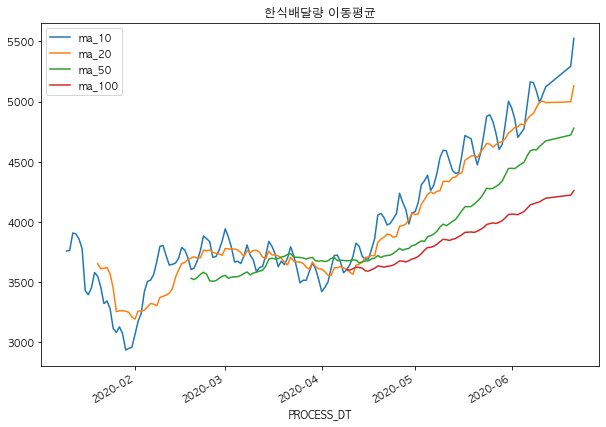

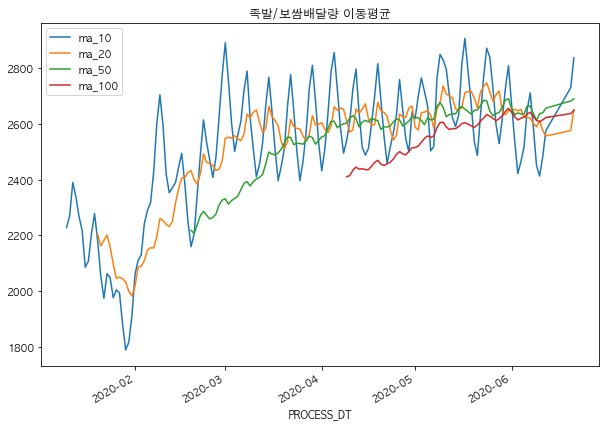

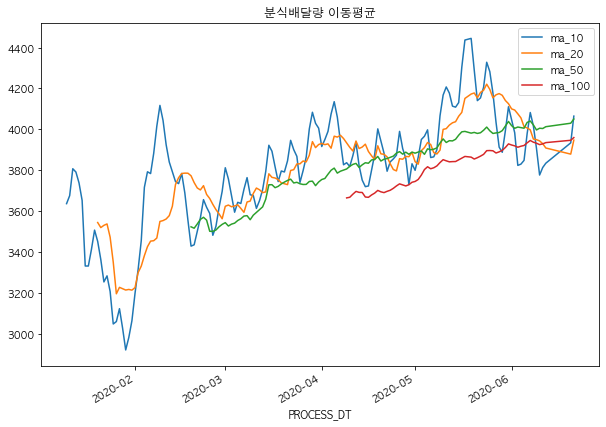

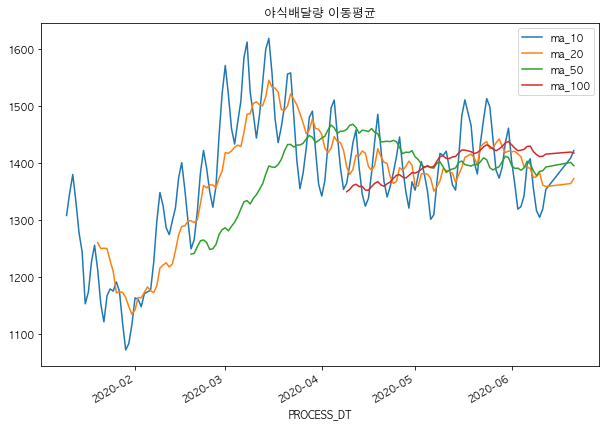

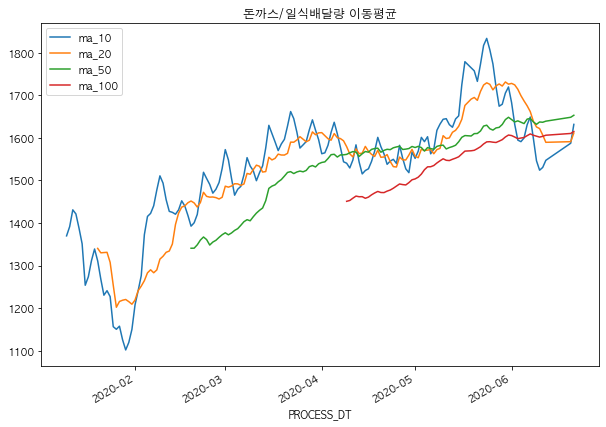

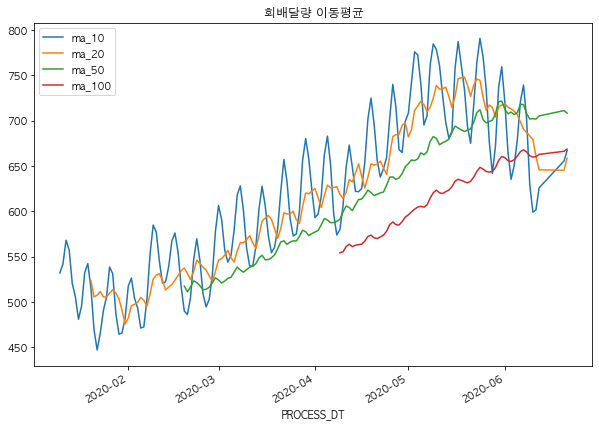

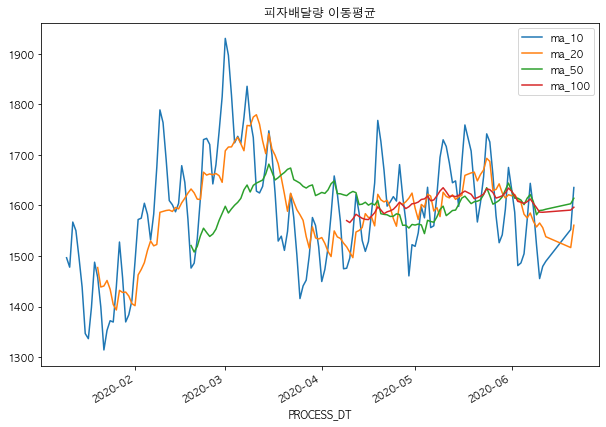

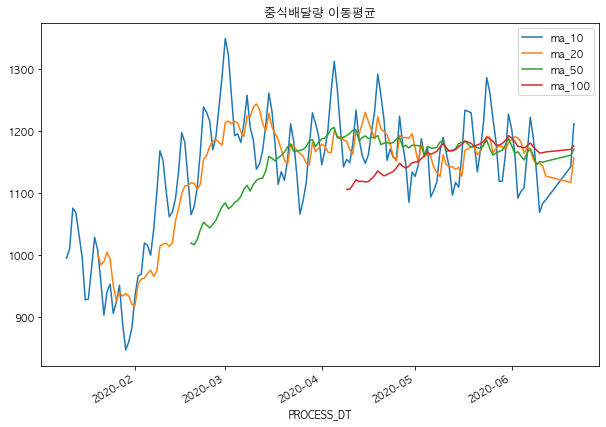

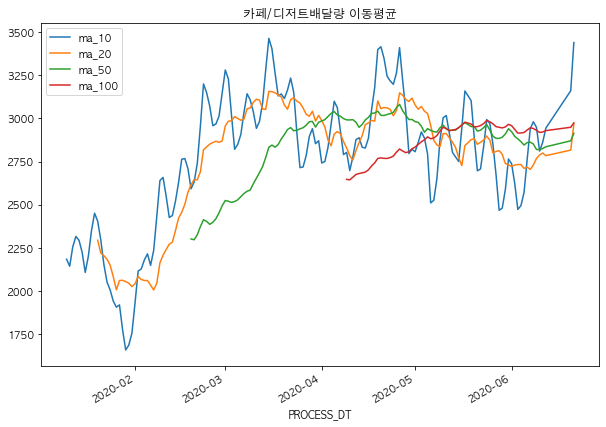

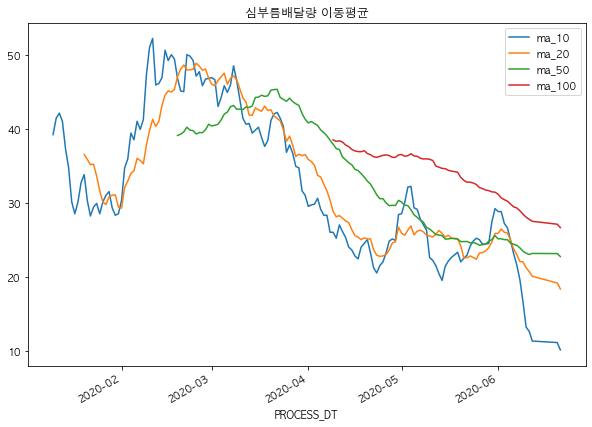

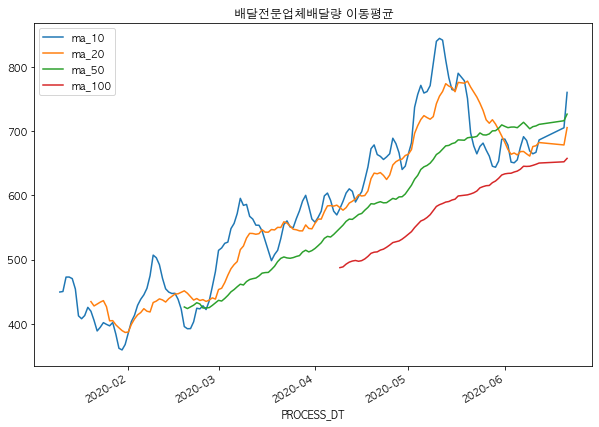

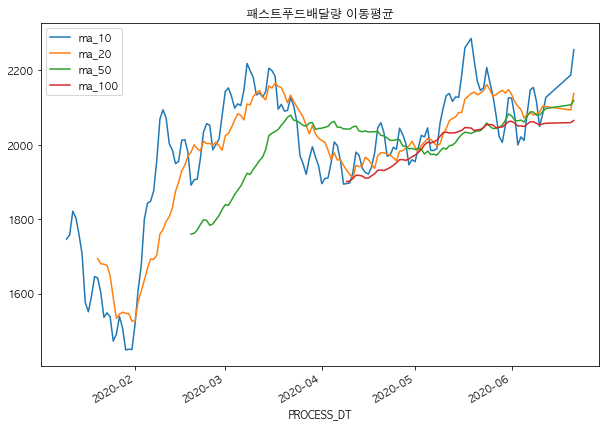

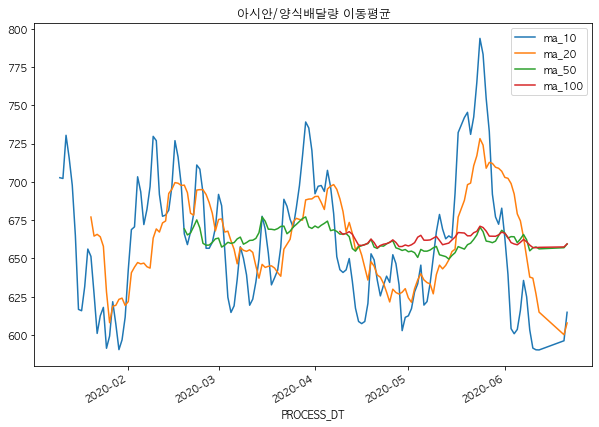

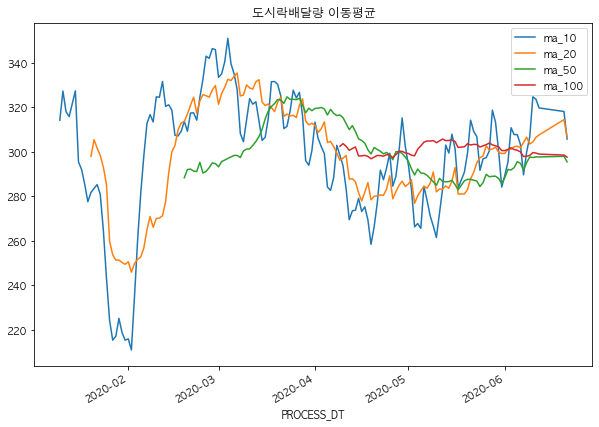

In [100]:
for i in del_list :
    plt.figure(figsize=(10,7))
    rolling_mean(menuday(i)['DLVR_STORE_INDUTY_NM'])
    plt.title(i+"배달량 이동평균")

In [102]:
maindel = ['치킨','족발/보쌈','분식','야식','피자','중식','패스트푸드','아시안/양식','도시락']
subdel = ['찜탕','한식','돈까스/일식','회','카페/디저트']

### 3.3 품목 별 배달량 변화
#### 가설 : 품목별로 배달량의 변화에 차이가 있을 것이다.
#### 결과
* 배달 비주류 음식 배달량 증가 : 찜/탕, 한식, 돈까스/일식, 회, 카페/디저트 중 특히 카페/디저트, 한식 배달량이 눈에 띄게 증가
* 배달 주류 음식 배달량 : 치킨, 족발, 분식, 야식, 피자, 중식, 패스트 푸드,도시락 등 기존에 사람들이 자주 이용하던 메뉴는 소폭 증가.
* 심부름 배달의 경우 코로나가 가장 심했던 3월부터 잠깐 증가했다가 다시 돌아온 것으로 보임.

<Figure size 576x576 with 0 Axes>

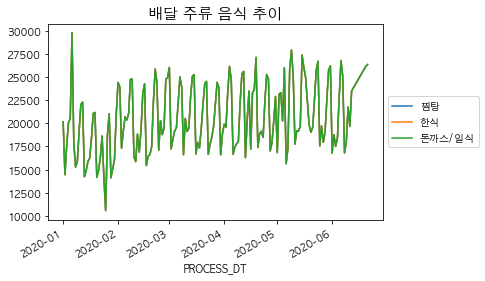

In [108]:
plt.figure(figsize=(8,8))
df_menu[df_menu["main"]== "main"].groupby("PROCESS_DT").count().plot(legend=False)
plt.title("배달 주류 음식 추이", fontsize=15)
plt.legend(subdel,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

<Figure size 576x576 with 0 Axes>

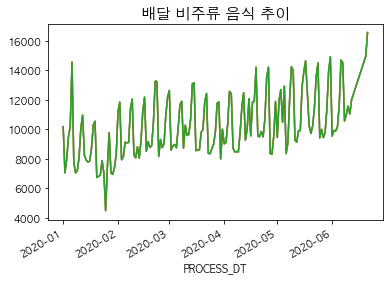

In [109]:
plt.figure(figsize=(8,8))
df_menu[df_menu["main"]== "sub"].groupby("PROCESS_DT").count().plot(legend=False)
plt.title("배달 비주류 음식 추이", fontsize=15)
plt.show()

Text(0.5, 1.0, '배달 주류 음식 이동평균')

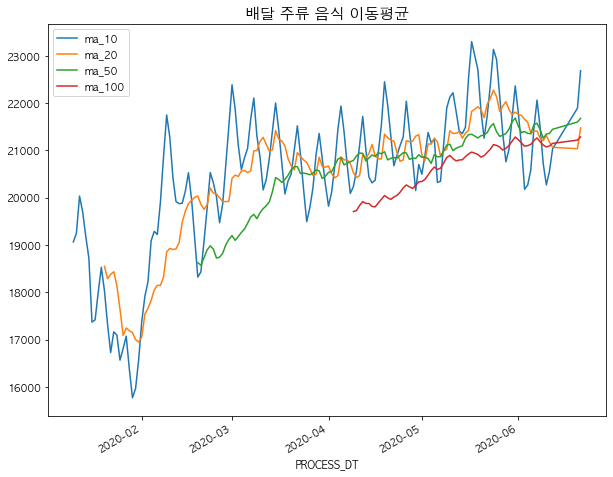

In [112]:
plt.figure(figsize=(10,8))
rolling_mean(df_main_cnt["main"])
plt.title("배달 주류 음식 이동평균", fontsize=15)

Text(0.5, 1.0, '배달 비주류 음식 이동평균')

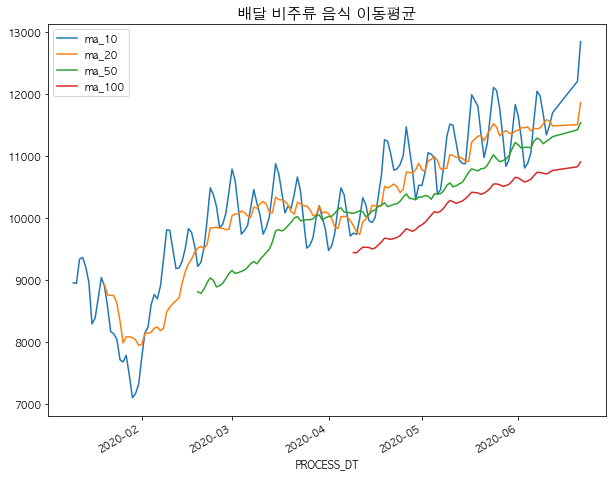

In [113]:
plt.figure(figsize=(10,8))
rolling_mean(df_sub_cnt["main"])
plt.title("배달 비주류 음식 이동평균", fontsize=15)

Text(0.5, 1.0, '비주류 항목 이동평균')

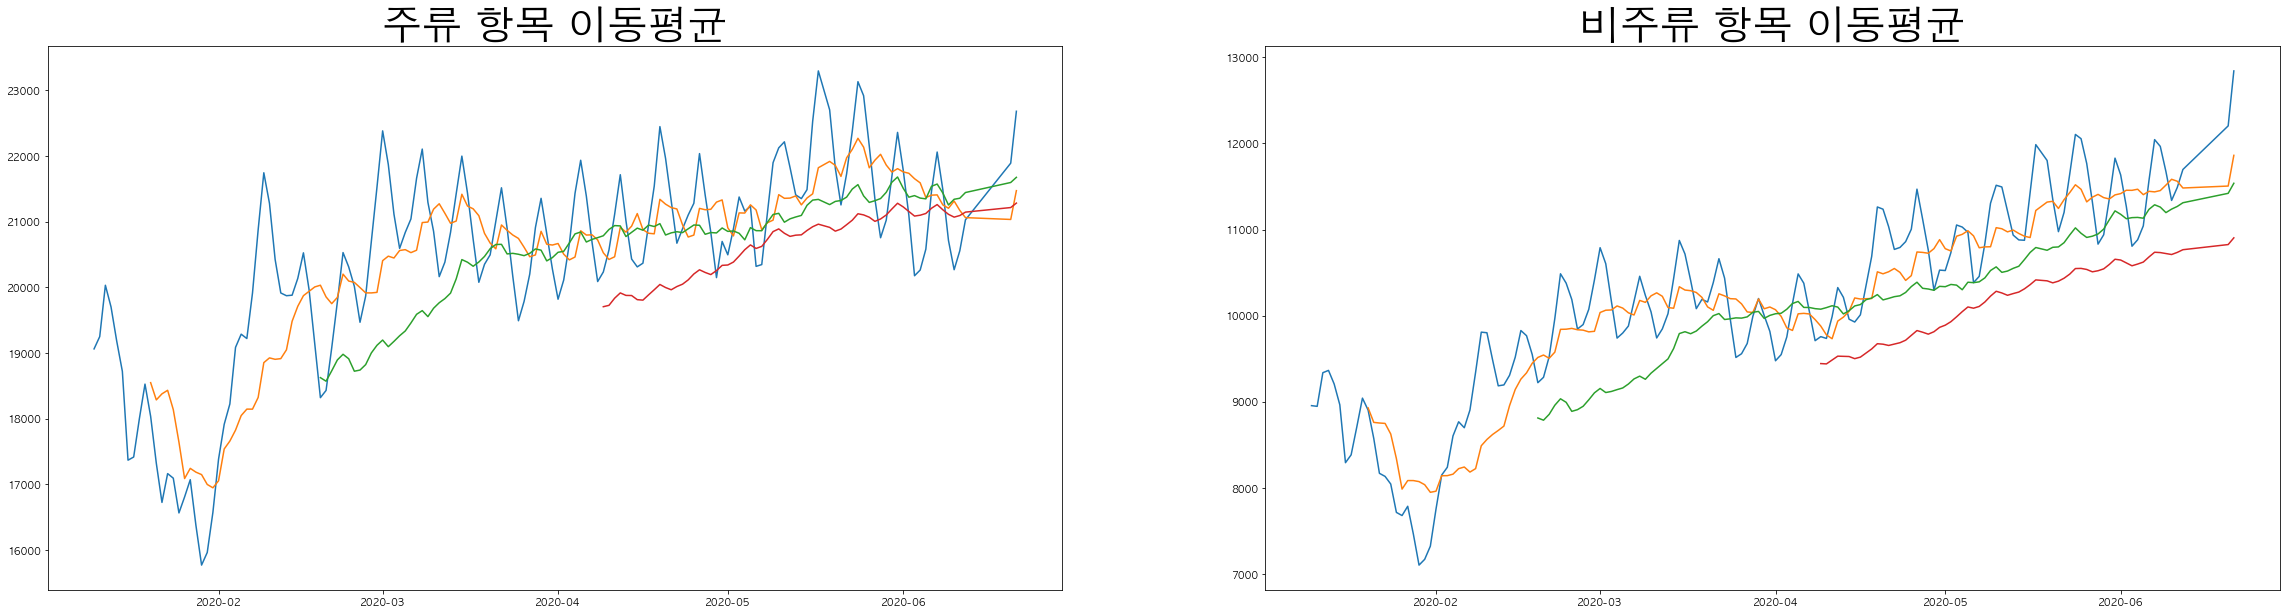

In [114]:
fig, ax = plt.subplots(1, 2,figsize=(40,10)) # 각 액자들에 그래프를 그린다. 
ax[0].plot(df_main_cnt["main"].rolling(10).mean()) 
ax[0].plot(df_main_cnt["main"].rolling(20).mean()) 
ax[0].plot(df_main_cnt["main"].rolling(50).mean()) 
ax[0].plot(df_main_cnt["main"].rolling(100).mean()) 
ax[0].set_title("주류 항목 이동평균",fontsize =40)


ax[1].plot(df_sub_cnt["main"].rolling(10).mean()) 
ax[1].plot(df_sub_cnt["main"].rolling(20).mean()) 
ax[1].plot(df_sub_cnt["main"].rolling(50).mean()) 
ax[1].plot(df_sub_cnt["main"].rolling(100).mean()) 
ax[1].set_title("비주류 항목 이동평균",fontsize =40)



In [115]:
df_del.head()

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,...,D0005271,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,...,D0003269,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,...,D0001536,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,...,D0005061,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,...,D0005215,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN


### 3.4 결제패턴의 변화 1:카드 2 :선불 3 :현금
#### 가설 : 배달원과의 접촉을 피하기 위해서 선불결제가 늘어났을 것이다.
#### 결과
   * 카드결제, 선불결제는 증가, 현금 결제는 꾸준히 감소하는 추세 
   * 코로나가 가장 심했던 3~4월에 선불결제,카드 사용량이 더욱 증가 했다
   * 5월11에 정부 재난 지원금이 나오기 시작. 선불결제와 현금사용이 감소, 카드결제가 증가 하기 시작했다.
        * 재난 지원금으로 인해 배달원과 접촉하는 사람이 더 많아졌다.

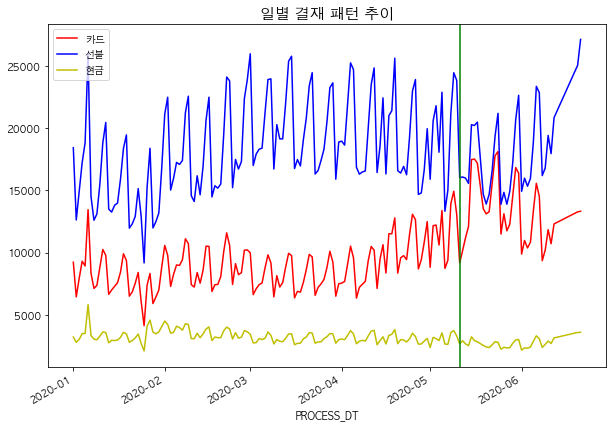

In [116]:
# 1:카드 2:선불 3:현금
plt.figure(figsize=(10,7))
df_del[df_del['SETLE_KND_VALUE']==1 ].groupby("PROCESS_DT")["SETLE_KND_VALUE"].count().plot(c='r') 
df_del[df_del['SETLE_KND_VALUE']==2 ].groupby("PROCESS_DT")["SETLE_KND_VALUE"].count().plot(c='b') 
df_del[df_del['SETLE_KND_VALUE']==3 ].groupby("PROCESS_DT")["SETLE_KND_VALUE"].count().plot(c='y')
plt.axvline('2020-05-11', color='g')
plt.title("일별 결재 패턴 추이", fontsize=15)
plt.legend(['카드','선불','현금'])


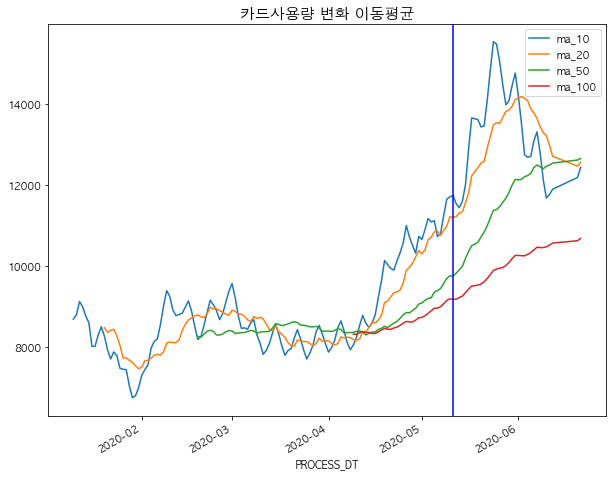

In [117]:
plt.figure(figsize=(10,8))
plt.title("카드사용량 변화 이동평균", fontsize=15)
rolling_mean(df_del[df_del['SETLE_KND_VALUE']==1 ].groupby("PROCESS_DT")["SETLE_KND_VALUE"].count())
plt.axvline('2020-05-11', color='b')

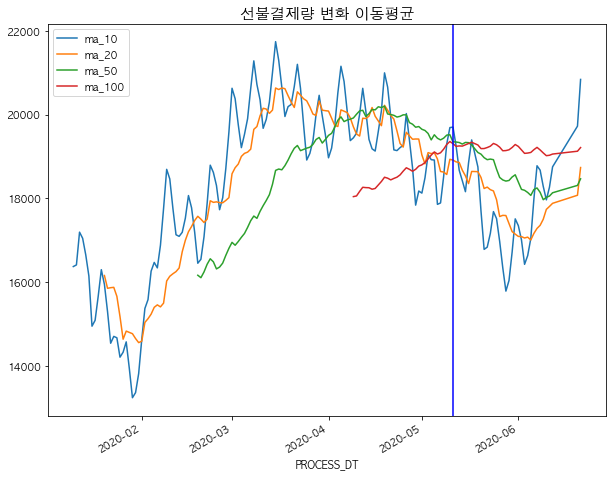

In [118]:
plt.figure(figsize=(10,8))
plt.title("선불결제량 변화 이동평균", fontsize=15)
rolling_mean(df_del[df_del['SETLE_KND_VALUE']==2 ].groupby("PROCESS_DT")["SETLE_KND_VALUE"].count())
plt.axvline('2020-05-11', color='b')

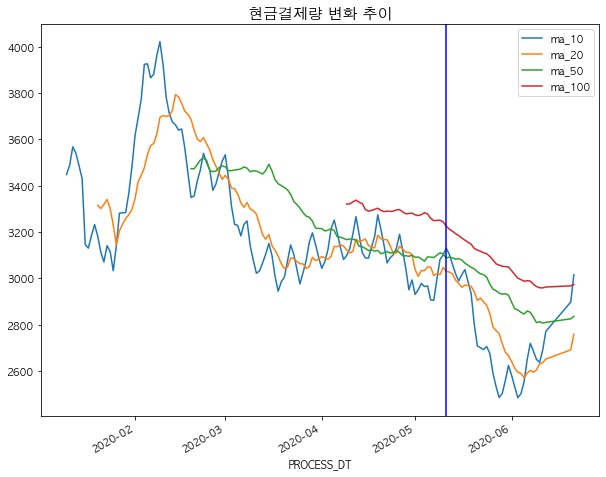

In [119]:
plt.figure(figsize=(10,8))
plt.title("현금결제량 변화 추이", fontsize=15)
rolling_mean(df_del[df_del['SETLE_KND_VALUE']==3 ].groupby("PROCESS_DT")["SETLE_KND_VALUE"].count())
plt.axvline('2020-05-11', color='b')

Text(0.5, 1.0, '현금 결제량 이동평균')

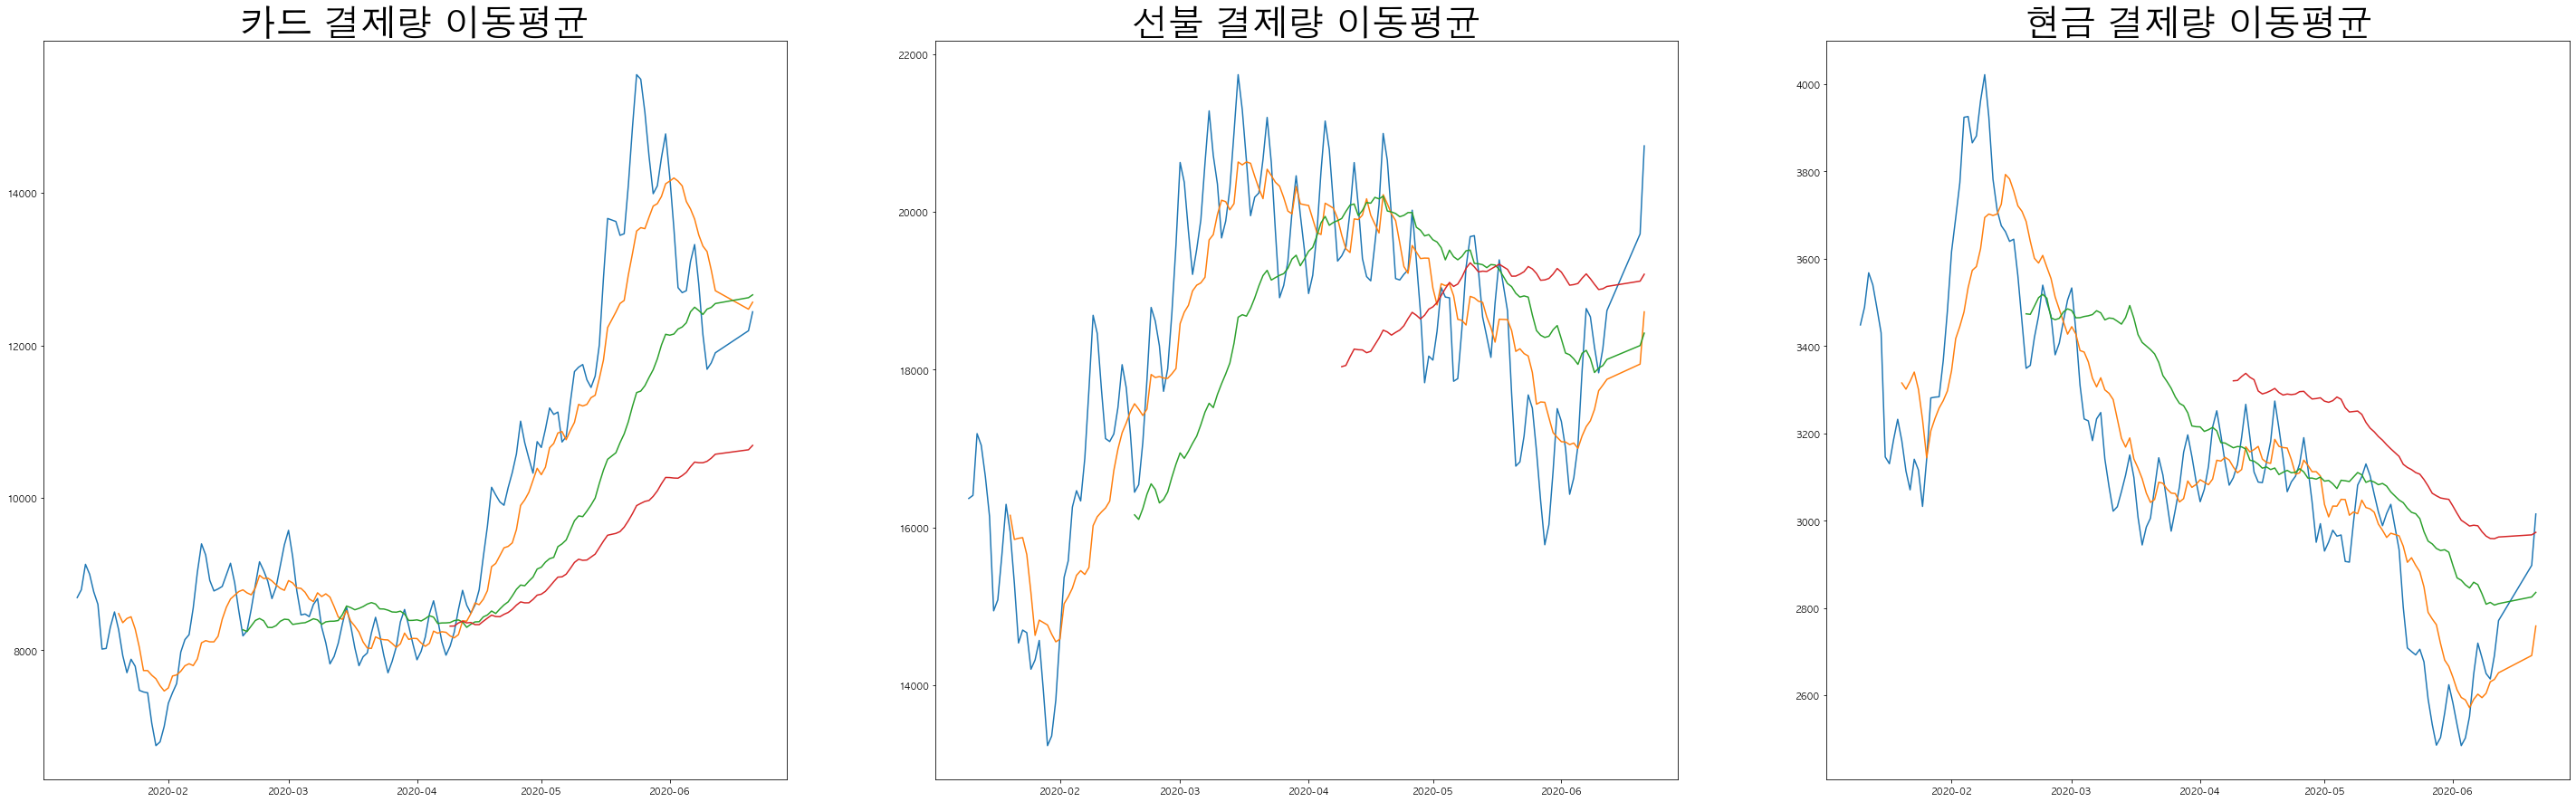

In [120]:
fig, ax = plt.subplots(1, 3,figsize=(50,15)) # 각 액자들에 그래프를 그린다. 
ax[0].plot(df_del[df_del['SETLE_KND_VALUE']==1 ].groupby("PROCESS_DT")["SETLE_KND_VALUE"].count().rolling(10).mean()) 
ax[0].plot(df_del[df_del['SETLE_KND_VALUE']==1 ].groupby("PROCESS_DT")["SETLE_KND_VALUE"].count().rolling(20).mean()) 
ax[0].plot(df_del[df_del['SETLE_KND_VALUE']==1 ].groupby("PROCESS_DT")["SETLE_KND_VALUE"].count().rolling(50).mean()) 
ax[0].plot(df_del[df_del['SETLE_KND_VALUE']==1 ].groupby("PROCESS_DT")["SETLE_KND_VALUE"].count().rolling(100).mean()) 
ax[0].set_title("카드 결제량 이동평균",fontsize =40)


ax[1].plot(df_del[df_del['SETLE_KND_VALUE']==2 ].groupby("PROCESS_DT")["SETLE_KND_VALUE"].count().rolling(10).mean()) 
ax[1].plot(df_del[df_del['SETLE_KND_VALUE']==2 ].groupby("PROCESS_DT")["SETLE_KND_VALUE"].count().rolling(20).mean()) 
ax[1].plot(df_del[df_del['SETLE_KND_VALUE']==2 ].groupby("PROCESS_DT")["SETLE_KND_VALUE"].count().rolling(50).mean()) 
ax[1].plot(df_del[df_del['SETLE_KND_VALUE']==2 ].groupby("PROCESS_DT")["SETLE_KND_VALUE"].count().rolling(100).mean()) 
ax[1].set_title("선불 결제량 이동평균",fontsize =40)


ax[2].plot(df_del[df_del['SETLE_KND_VALUE']==3 ].groupby("PROCESS_DT")["SETLE_KND_VALUE"].count().rolling(10).mean()) 
ax[2].plot(df_del[df_del['SETLE_KND_VALUE']==3 ].groupby("PROCESS_DT")["SETLE_KND_VALUE"].count().rolling(20).mean()) 
ax[2].plot(df_del[df_del['SETLE_KND_VALUE']==3 ].groupby("PROCESS_DT")["SETLE_KND_VALUE"].count().rolling(50).mean()) 
ax[2].plot(df_del[df_del['SETLE_KND_VALUE']==3 ].groupby("PROCESS_DT")["SETLE_KND_VALUE"].count().rolling(100).mean()) 
ax[2].set_title("현금 결제량 이동평균",fontsize =40)

